In [24]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image


In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

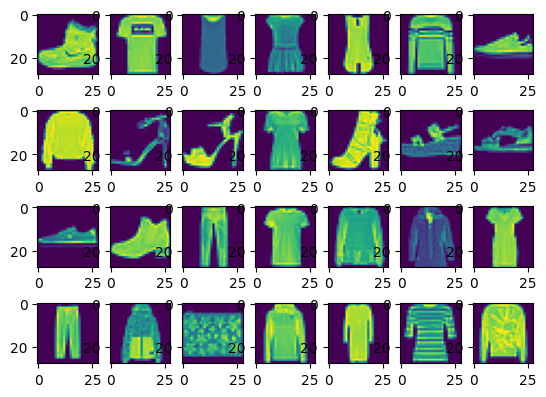

In [28]:
for i in range(28):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show;

In [29]:
input_shape = (28, 28,1)

In [30]:
model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
        # MaxPooling2D( (2,2), strides = 2),
        Flatten(),  # перевод в одномерный массив
        Dense(50, activation="relu"),  # количество входных нейронов
        Dense(10, activation="softmax"),  # количество выходных нейронов
    ]
)

In [31]:
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [33]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4098 - accuracy: 0.8562 - val_loss: 0.3276 - val_accuracy: 0.8847
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2808 - accuracy: 0.8994 - val_loss: 0.2950 - val_accuracy: 0.8904
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2388 - accuracy: 0.9135 - val_loss: 0.2937 - val_accuracy: 0.8936
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2116 - accuracy: 0.9227 - val_loss: 0.2547 - val_accuracy: 0.9088
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1888 - accuracy: 0.9309 - val_loss: 0.2583 - val_accuracy: 0.9077
CPU times: total: 8min 41s
Wall time: 1min 57s


In [34]:
model_2 = keras.Sequential(
    [keras.Input(shape=input_shape), Flatten(), Dense(50, activation="relu"), Dense(10, activation="softmax")]
)

In [35]:
model_2.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [36]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5339 - accuracy: 0.8167 - val_loss: 0.4567 - val_accuracy: 0.8369
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4089 - accuracy: 0.8551 - val_loss: 0.4238 - val_accuracy: 0.8527
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3702 - accuracy: 0.8678 - val_loss: 0.4002 - val_accuracy: 0.8551
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3485 - accuracy: 0.8740 - val_loss: 0.3742 - val_accuracy: 0.8675
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3295 - accuracy: 0.8817 - val_loss: 0.3754 - val_accuracy: 0.8642
CPU times: total: 34.6 s
Wall time: 19.6 s


In [37]:
model_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(64, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Flatten(),  # перевод в одномерный массив
        Dense(50, activation="relu"),  # количество входных нейронов
        Dense(10, activation="softmax"),  # количество выходных нейронов
    ]
)

In [38]:
model_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.4418 - accuracy: 0.8415 - val_loss: 0.3430 - val_accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2928 - accuracy: 0.8943 - val_loss: 0.2996 - val_accuracy: 0.8898
Epoch 3/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2479 - accuracy: 0.9101 - val_loss: 0.3111 - val_accuracy: 0.8889
Epoch 4/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2196 - accuracy: 0.9210 - val_loss: 0.2992 - val_accuracy: 0.8976
Epoch 5/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1949 - accuracy: 0.9287 - val_loss: 0.2510 - val_accuracy: 0.9095
CPU times: total: 17min 37s
Wall time: 4min 6s


In [40]:
model_4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(64, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(128, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Flatten(),  # перевод в одномерный массив
        Dense(128, activation="relu"),  # количество входных нейронов
        Dense(10, activation="softmax"),  # количество выходных нейронов
    ]
)

In [41]:
model_4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 81s 40ms/step - loss: 0.4372 - accuracy: 0.8398 - val_loss: 0.3246 - val_accuracy: 0.8831
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2743 - accuracy: 0.9001 - val_loss: 0.2784 - val_accuracy: 0.8989
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2299 - accuracy: 0.9144 - val_loss: 0.2620 - val_accuracy: 0.9035
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1996 - accuracy: 0.9263 - val_loss: 0.2400 - val_accuracy: 0.9114
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1743 - accuracy: 0.9341 - val_loss: 0.3068 - val_accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1524 - accuracy: 0.9429 - val_loss: 0.2786 - val_accuracy: 0.9034
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1326 - accuracy: 0.9502 - val_loss: 0.2449 -

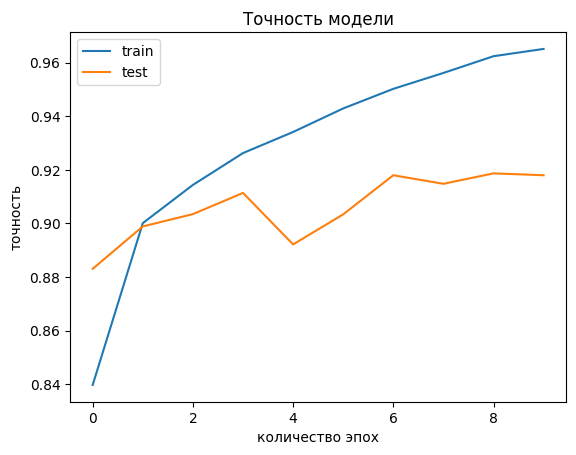

In [43]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Точность модели")
plt.ylabel("точность")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

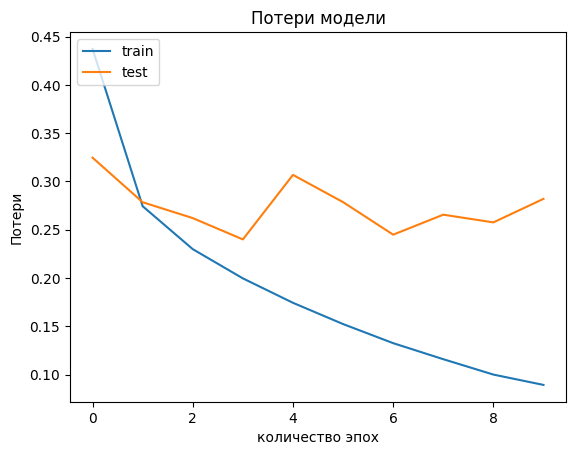

In [44]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [45]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 128)       

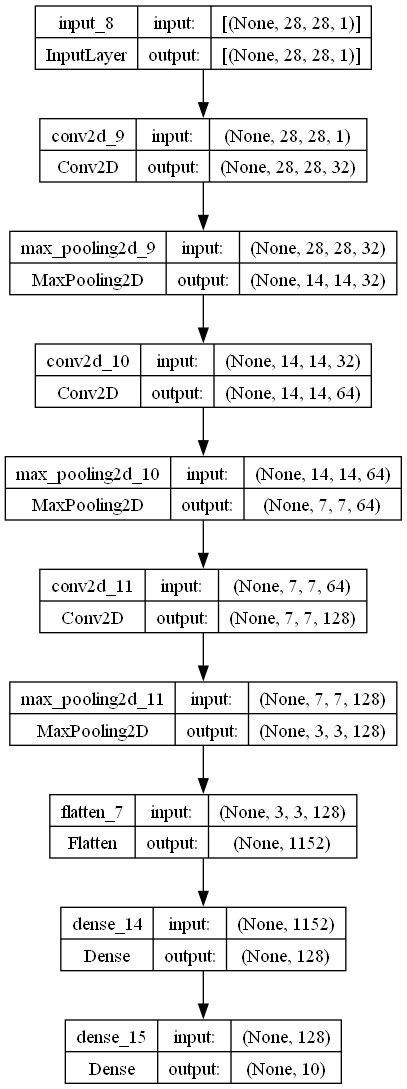

In [46]:
keras.utils.plot_model(model_4, to_file="model.png", show_shapes=True)